# 주유소 데이터 분석

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

## 1. 싼 주유소(보통휘발유) 데이터를 엑셀로 받기

In [55]:
url = 'https://www.opinet.co.kr/user/main/mainView.do'
driver = webdriver.Chrome('chromedriver.exe')
driver.get(url)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_8628\1885612742.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


In [56]:
# 팝업창 싼주유소 찾기 클릭
driver.find_element(By.CLASS_NAME, 'm1').click()

In [52]:
# 지역 변경 - 서울
metro = driver.find_element(By.XPATH, '//*[@id="SIDO_NM0"]')
metro.send_keys('서울')

In [ ]:
# 엑셀 저장
driver.find_element(By.ID, 'glopopd_excel').click()

In [57]:
# 서울의 자치구를 바꿔가면서 엑셀파일 저장
for i in range(2,27):
    # 서울 자치구 찾기
    opt = driver.find_element(By.XPATH, f'//*[@id="SIGUNGU_NM0"]/option[{i}]').click()
    # 엑셀저장 클릭
    driver.find_element(By.ID, 'glopopd_excel').click()

In [76]:
driver.close()

## 2. 구별 휘발유 가격 데이터 정리

In [2]:
# 다운로드 한 데이터 가져오기
from glob import glob
glob(r'C:\Users\tjoeun\Downloads\지역*.xls')

['C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (1).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (10).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (11).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (12).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (13).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (14).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (15).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (16).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (17).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (18).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (19).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (2).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (20).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (21).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (22).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (23).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (24).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (3).xls',
 'C:\\Users\\

In [3]:
file = glob(r'C:\Users\tjoeun\Downloads\지역*.xls')[0]
pd.read_excel(file, header=2)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1569,1669,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1584,1753,-
2,서울특별시,(주)소모에너지 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-6956-6674,Y,1846,1596,1768,1650
3,서울특별시,대성석유(주)길동주유소,서울 강동구 천호대로 1168,GS칼텍스,02-474-7222,N,1865,1616,1768,1600
4,서울특별시,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),GS칼텍스,02-441-3327,Y,1855,1635,1755,1615
5,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,-,1645,1785,1700
6,서울특별시,(주)소모에너지 성내주유소,서울 강동구 올림픽로 578 (성내동),GS칼텍스,02-479-3838,Y,-,1658,1818,-
7,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,1809,1659,1757,-
8,서울특별시,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),현대오일뱅크,02-3428-1739,Y,1953,1664,1758,-
9,서울특별시,sk해뜨는주유소,서울 강동구 상일로 132 (강일동),SK에너지,02-442-7801,Y,-,1665,1839,1800


In [4]:
df_list = []
for file in glob(r'C:\Users\tjoeun\Downloads\지역*.xls'):
    gs = pd.read_excel(file, header=2)
    df_list.append(gs)
df = pd.concat(df_list)
df.shape

(443, 10)

In [5]:
df = df[['상호', '주소', '휘발유', '셀프여부', '상표']]
df.head(2)

,상호,주소,휘발유,셀프여부,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1569,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1584,N,현대오일뱅크


In [7]:
df.rename(columns={'휘발유' : '가격', '셀프여부' : '셀프'}, inplace=True)

In [8]:
df

,상호,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1569,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1584,N,현대오일뱅크
2,(주)소모에너지 신월주유소,서울 강동구 양재대로 1323 (성내동),1596,Y,GS칼텍스
3,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1616,N,GS칼텍스
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1635,Y,GS칼텍스
...,...,...,...,...,...
28,대청주유소,서울 강남구 개포로 654 (일원동),2196,N,SK에너지
29,SK논현주유소,서울 강남구 논현로 747 (논현동),2290,N,SK에너지
30,갤러리아주유소,서울 강남구 압구정로 426,2290,N,SK에너지
31,(주)새서울네트웍스 제이제이주유소,서울 강남구 언주로 716,2298,N,현대오일뱅크


In [14]:
df['구'] = df['주소'].apply(lambda x : x.split(' ')[1])

In [18]:
df['구'].nunique()

25

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 0 to 32
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      443 non-null    object
 1   주소      443 non-null    object
 2   가격      443 non-null    int64 
 3   셀프      443 non-null    object
 4   상표      443 non-null    object
 5   구       443 non-null    object
dtypes: int64(1), object(5)
memory usage: 40.4+ KB


In [21]:
df['가격'].unique()

array([1569, 1584, 1596, 1616, 1635, 1645, 1658, 1659, 1664, 1665, 1678,
       1695, 1876, 2028, 1520, 1523, 1525, 1545, 1555, 1565, 1568, 1585,
       1590, 1595, 1597, 1598, 1790, 1556, 1579, 1599, 1619, 1629, 1639,
       1765, 1507, 1557, 1558, 1699, 1729, 1898, 1529, 1534, 1539, 1543,
       1559, 1574, 1589, 1509, 1605, 1617, 1618, 1625, 1628, 1644, 1648,
       1649, 1657, 1666, 1669, 1676, 1698, 1793, 1795, 1968, 1989, 1524,
       1566, 1609, 1735, 1896, 1935, 2098, 1519, 1535, 1537, 1554, 1567,
       1575, 1684, 1692, 1563, 1583, 1587, 1592, 1593, 1626, 1627, 1637,
       1868, 1508, 1510, 1518, 1527, 1546, 1549, 1586, 1633, 1517, 1547,
       1572, 1895, 1938, 1995, 2010, 2199, 1548, 1778, 1942, 1970, 1991,
       2019, 2052, 2063, 2197, 2213, 2625, 1514, 1515, 1544, 1571, 1578,
       1690, 1845, 2128, 2210, 2220, 1779, 1948, 2048, 2419, 2631, 1485,
       1498, 1516, 1550, 1630, 1655, 1688, 1753, 1928, 1594, 1718, 1756,
       1757, 1526, 1738, 1560, 1797, 1799, 2198, 16

In [22]:
df['가격'] = df['가격'].astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 0 to 32
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      443 non-null    object
 1   주소      443 non-null    object
 2   가격      443 non-null    int32 
 3   셀프      443 non-null    object
 4   상표      443 non-null    object
 5   구       443 non-null    object
dtypes: int32(1), object(5)
memory usage: 38.7+ KB


In [24]:
df.to_csv('서울_주유소_230113.csv', index=False)

## 3. 셀프 주유소가 정말 저렴한지 확인

In [134]:
df = pd.read_csv('서울_주유소_230113.csv')

In [25]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [26]:
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'

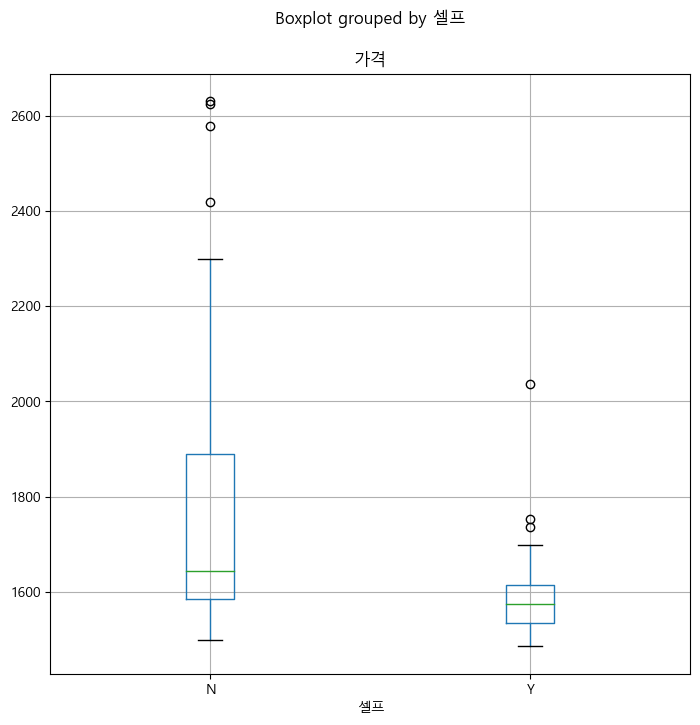

In [27]:
df.boxplot(column='가격', by='셀프', figsize=(8,8))
plt.show()

In [30]:
# 셀프 여부에 따른 평균 가격
df.groupby('셀프')[['가격']].mean()

,가격
셀프,
N,1746.452632
Y,1581.770751


In [32]:
df[df.셀프 == 'Y'].shape, df[df.셀프 == 'N'].shape # 서울은 셀프 주유소의 개수가 더 많음

((253, 6), (190, 6))

* 전반적으로 셀프주유소가 일반주유소보다 저렴함

### 독립표본 T-test
* paired sample T-test
* p-value가 0.05보다 작으면 귀무가설을 기각, 대립가설을 채택
     - 귀무가설(H0) : 셀프 주유소와 일반 주유소의 가격차이가 없다.
     - 대립가설(H1) : 셀프 주유소와 일반 주유소의 가격차이가 있다.

In [33]:
# scipy 설치
!pip install scipy

     ---------------------------------------- 42.2/42.2 MB 6.2 MB/s eta 0:00:00


In [34]:
import scipy as sp

In [37]:
# t-test
sp.stats.ttest_ind(df[df.셀프 == 'Y'].가격, df[df.셀프 == 'N'].가격, equal_var=False)

Ttest_indResult(statistic=-9.362749592727637, pvalue=1.3691530542543917e-17)

* t-test 결과 귀무가설 기각, 대립가설 채택. 즉, 가격차이가 있음.

### 브랜드 별 가격비교

In [40]:
df['상표'].unique()

array(['현대오일뱅크', 'GS칼텍스', 'SK에너지', 'S-OIL', '알뜰(ex)', '자가상표', '알뜰주유소'],
      dtype=object)

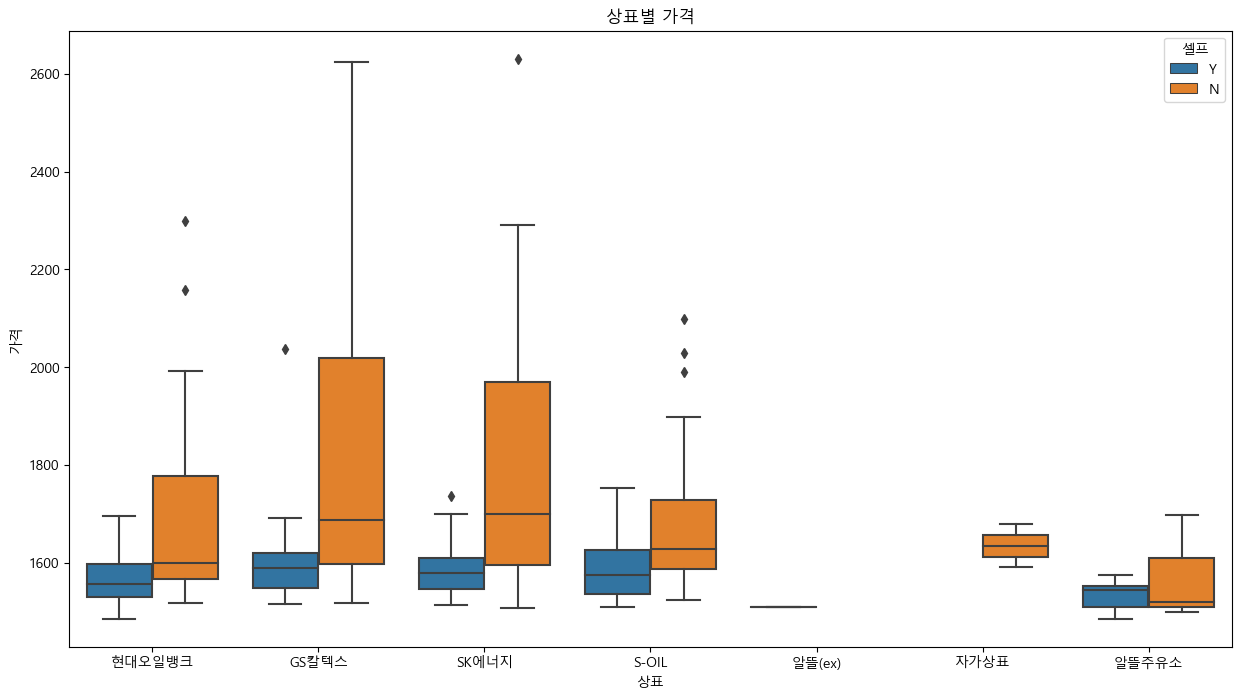

In [44]:
# 상표별 가격 확인
plt.figure(figsize=(15,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=df)
plt.title('상표별 가격')
plt.show()

* 브랜드 별 가격 또한 셀프가 대체적으로 저렴

## 4. 구별 휘발유 가격비교

In [45]:
import json, folium

In [135]:
# 가격이 싼 주유소 top5
df.sort_values(by='가격').head()

,상호,주소,가격,셀프,상표,구
288,화곡역주유소,서울 강서구 강서로 154 (화곡동),1485,Y,알뜰주유소,강서구
289,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),1485,Y,현대오일뱅크,강서구
290,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1498,N,알뜰주유소,강서구
40,마포시엠주유소,서울 마포구 월드컵북로 62,1507,N,SK에너지,마포구
41,성산대교셀프주유소,서울 마포구 성산로 144,1507,Y,현대오일뱅크,마포구


In [136]:
#가격이 비싼 주유소 top5
df.sort_values(by='가격', ascending=False).head()

,상호,주소,가격,셀프,상표,구
274,서남주유소,서울 중구 통일로 30,2631,N,SK에너지,중구
240,서계주유소,서울 용산구 청파로 367 (청파동),2625,N,GS칼텍스,용산구
442,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578,N,GS칼텍스,강남구
273,필동주유소,서울 중구 퇴계로 196 (필동2가),2419,N,GS칼텍스,중구
441,(주)새서울네트웍스 제이제이주유소,서울 강남구 언주로 716,2298,N,현대오일뱅크,강남구


In [138]:
# 컬럼이 구별로 최대값인지 최소값인지 구분하는 기준 - 0:defalt, 1:min, 2:max
df['mM'] = 0

In [141]:
# 해당구에서 최대값, 최소값 구하기
gu_mM = df.groupby('구')['가격'].agg(['mean', 'min', 'max']).sort_values('mean', ascending=False)
gu_mM.head()

,mean,min,max
구,,,
용산구,2084.750000,1778,2625
중구,1975.200000,1609,2631
강남구,1874.575758,1605,2578
종로구,1853.750000,1569,2220
성동구,1719.500000,1524,2098


## 5. 각 구별 가격이 최대, 최소값인 곳만 지도에 나타내기

In [164]:
# 강남구로 확인
_, m, M = gu_mM.loc['강남구']
m, M = int(m), int(M)
m, M

(1605, 2578)

In [144]:
# 가격과 최소값(m), 최대값(M) 비교
for gu in gu_mM.index:
    _, m, M = gu_mM.loc[gu]
    m, M = int(m), int(M)
    for i in df.index:
        if df.가격[i] == m and df.구[i] == gu:
            df.mM[i] = 1
        if df.가격[i] == M and df.구[i] == gu:
            df.mM[i] = 2

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_2480\201372312.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.mM[i] = 1
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_2480\201372312.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.mM[i] = 2


In [170]:
# 각 구별 가격이 최대,최소값인 곳만 추출
df1 = df[df.mM != 0]
df1.head()

,상호,주소,가격,셀프,상표,구,mM
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1569,Y,현대오일뱅크,강동구,1
13,광성주유소,서울 강동구 올림픽로 673 (천호동),2028,N,S-OIL,강동구,2
14,동서울고속주유소,서울 동대문구 한천로 414,1520,Y,SK에너지,동대문구,1
30,한영주유소 (한화),서울 동대문구 망우로 38 (휘경동),1790,N,현대오일뱅크,동대문구,2
31,지에스칼텍스(주) 대방주유소,서울 동작구 여의대방로 214,1555,N,GS칼텍스,동작구,1


In [171]:
# kakao key 불러오기
with open('C:\workspace\kakao_key.txt') as file:
    kakao_key = file.read()

In [172]:
import requests
from urllib.parse import quote

In [173]:
# kakao_key를 통해서 주유소의 위도 경도 좌표 구하기
local_url = 'https://dapi.kakao.com/v2/local/search/address.json'
header = {"Authorization": "KakaoAK " + kakao_key}

lngs, lats = [], []
for i in df1.index:
    url = f'{local_url}?query={quote(df1.주소[i])}'
    result = requests.get(url, headers = header).json()['documents']
    try:
        lngs.append(float(result[0]['x']))
        lats.append(float(result[0]['y']))
    except:
        print(df.상호[i])

In [175]:
df1['위도'] = lats
df1['경도'] = lngs
df1.head()

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_2480\1378242225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['위도'] = lats
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_2480\1378242225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['경도'] = lngs


,상호,주소,가격,셀프,상표,구,mM,위도,경도
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1569,Y,현대오일뱅크,강동구,1,37.536417,127.149372
13,광성주유소,서울 강동구 올림픽로 673 (천호동),2028,N,S-OIL,강동구,2,37.541577,127.124242
14,동서울고속주유소,서울 동대문구 한천로 414,1520,Y,SK에너지,동대문구,1,37.597544,127.068039
30,한영주유소 (한화),서울 동대문구 망우로 38 (휘경동),1790,N,현대오일뱅크,동대문구,2,37.588425,127.057395
31,지에스칼텍스(주) 대방주유소,서울 동작구 여의대방로 214,1555,N,GS칼텍스,동작구,1,37.505736,126.922881


In [183]:
# 지도에 주유소 위치 표시 - 비싼곳은 빨간색 아래방향의 엄지, 싼곳은 초록색 위 방향의 엄지
map = folium.Map(location=[df1.위도.mean(), df1.경도.mean()], zoom_start=12)
for i in df1[df1.mM == 1].index[:]:
    folium.Marker(
        location=[df1.위도[i],df1.경도[i]], 
        popup=folium.Popup(df1.주소[i], max_width=200), 
        tooltip=df1.상호[i],
        icon = folium.Icon(icon = 'glyphicon glyphicon-thumbs-up', color='green')
    ).add_to(map)
for i in df1[df1.mM == 2].index[:]:
    folium.Marker(
        location=[df1.위도[i],df1.경도[i]], 
        popup=folium.Popup(df1.주소[i], max_width=200), 
        tooltip=df1.상호[i],
        icon = folium.Icon(icon = 'glyphicon glyphicon-thumbs-down', color='red')
    ).add_to(map)
title = '<h3 align="center" style="font-size:20px">서울시 구별 가장 <span style="color:red">비싸거나</span> <span style="color:green">값싼</span> 주유소</h3>'
map.get_root().html.add_child(folium.Element(title))
map